# Parkisons Disease Detection using Machine Learning

In [2]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib

from IPython.display import display

# Data Collection


---


**Dataset Used :** Parkinsons Disease Dataset <br>
**Dataset Source :** UCI Machine Learning Repository <br>
**Dataset Hosting URL :** https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data <br>

In [4]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('PD_dataset.csv')

# Data Preprocessing


---
 The following steps are performed on the dataset in this section:
 + Dropping Redudant Columns
 + Checking For Duplicated Rows
 + Checking For Missing Values

In [5]:
# Exploring Dataset Content
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,File_Name
0,862.79640,1464.8367,157.31429,1.921820,0.409474,0.000014,0.002368,1.228421,-0.606172,11.216182,...,-0.994774,-1.005160,6.799462,0.289950,332.63300,110644.70,1438.542026,286.48750,0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav
1,833.89197,1628.9677,207.62355,2.128027,0.384920,0.000021,0.002858,1.154759,-0.485899,10.993189,...,39.311971,-0.100204,6.581059,0.185624,322.86420,104241.29,1530.478114,267.89252,0,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav
2,866.99680,1743.5444,170.92935,2.551339,0.339756,0.000015,0.002243,1.019268,-0.628418,12.217534,...,343.055463,-0.004280,5.856690,0.287073,399.12820,159303.31,1606.150957,343.05860,0,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav
3,795.48840,2460.4028,154.41739,2.304882,0.365131,0.000016,0.002412,1.095393,-0.500438,10.218175,...,0.333966,1.794502,6.395696,0.234027,375.62784,141096.28,1447.246807,307.88297,0,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav
4,976.91174,3625.4536,215.61485,1.774770,0.427675,0.000013,0.002330,1.283025,-0.472221,11.765720,...,0.568504,1.888806,7.197705,0.147949,520.53250,270954.06,2821.749727,351.79150,0,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav


In [6]:
df.tail()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,File_Name
76,1341.17570,3645.9224,187.47661,1.751746,0.430551,0.000013,0.002380,1.291653,-0.437518,14.850191,...,0.033534,14.867481,6.791326,0.075944,923.78420,853377.20,3558.787937,681.50195,1,AH_545841223-24FB0419-5BAE-4F9C-8EBC-CD62DA659...
77,810.61304,3624.6458,166.17620,1.975281,0.402976,0.000007,0.001678,1.208928,-0.430391,12.876986,...,0.227813,5.222875,7.081505,0.099545,420.62570,176925.98,2754.762383,301.21075,1,AH_545841226-C699FC9E-1E0C-474D-A12A-936DD92B8...
78,1392.73460,3057.1814,249.79486,1.203053,0.491576,0.000041,0.004464,1.474729,-0.677353,10.727424,...,-0.280352,-3.669188,5.946772,0.325783,568.23413,322890.00,2253.035986,481.97420,1,AH_545841227-5C77713A-66F1-49D0-BC8A-702C152E6...
79,727.24610,2469.6396,223.50050,2.462228,0.348631,0.000018,0.002480,1.045892,-0.557181,12.149962,...,1.031557,1.347558,5.989773,0.179159,345.60712,119444.29,1320.742517,279.37518,1,AH_545847410-D1BA3BB4-1F61-44CA-ACDE-455A8E97E...
80,998.58190,3357.6255,151.38910,1.827060,0.421161,0.000009,0.001984,1.263484,-0.590871,12.550086,...,-0.968389,-1.033110,7.933176,0.249132,488.58720,238717.44,3131.677490,333.06058,1,AH_545880204-EE87D3E2-0D4C-4EAA-ACD7-C3F177AFF...


In [7]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  81


The column **name**, is a *Redundant* column which is not useful for Analysis or Machine Learning, and will be dropped from the dataframe.

In [8]:
# Dropping The Name Column
df.drop(['File_Name'], axis=1, inplace=True)

In [9]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  81


In [10]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       81 non-null     float64
 1   MDVP:Fhi(Hz)      81 non-null     float64
 2   MDVP:Flo(Hz)      81 non-null     float64
 3   MDVP:Jitter(%)    81 non-null     float64
 4   MDVP:Jitter(Abs)  81 non-null     float64
 5   MDVP:RAP          81 non-null     float64
 6   MDVP:PPQ          81 non-null     float64
 7   Jitter:DDP        81 non-null     float64
 8   MDVP:Shimmer      81 non-null     float64
 9   MDVP:Shimmer(dB)  81 non-null     float64
 10  Shimmer:APQ3      81 non-null     float64
 11  Shimmer:APQ5      81 non-null     float64
 12  MDVP:APQ          81 non-null     float64
 13  Shimmer:DDA       81 non-null     float64
 14  NHR               81 non-null     float64
 15  HNR               81 non-null     float64
 16  RPDE              81 non-null     float64
 17 

In [11]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000
mean,937.073554,2443.772514,187.830759,2.083125,0.392515,0.000017,0.002549,1.177544,-0.569288,11.336179,...,34.008538,4.311087,-0.486277,6.496218,0.239042,457.748380,2.443832e+05,2055.608935,362.690941,0.493827
std,215.186886,827.701577,34.743563,0.383300,0.042218,0.000007,0.000590,0.126655,0.095328,1.419684,...,4.259052,38.620879,4.368456,0.559481,0.078134,187.843667,2.371241e+05,801.351225,152.798843,0.503077
min,484.612950,1180.572500,150.402650,1.203053,0.293504,0.000006,0.001367,0.880511,-0.905222,8.689936,...,26.069807,-23.057655,-20.773358,5.212112,0.075944,229.932460,5.286894e+04,1071.107544,184.427540,0.000000
25%,806.083740,1627.929100,157.495960,1.818297,0.366955,0.000012,0.002157,1.100864,-0.621351,10.369013,...,31.107038,-1.416497,-0.938569,6.093184,0.192035,341.348480,1.165188e+05,1371.890674,268.711430,0.000000
50%,877.507570,2517.376000,179.898700,2.047950,0.394284,0.000015,0.002412,1.182852,-0.557181,11.055770,...,33.167310,-0.817710,-0.413971,6.487861,0.234027,403.365420,1.627037e+05,1632.071890,317.321840,0.000000
75%,1005.198300,3132.138200,203.772350,2.288086,0.422250,0.000021,0.002858,1.266751,-0.492674,12.115863,...,36.347589,0.568722,0.336290,6.961357,0.283282,488.587200,2.387174e+05,2783.309258,377.107420,1.000000
max,1622.868900,3989.592300,312.299870,3.082724,0.491576,0.000041,0.004464,1.474729,-0.403063,15.626454,...,46.879363,343.055463,14.867481,7.933176,0.507964,1110.318500,1.232807e+06,3816.957922,994.861300,1.000000


It can be observed that the column **Status** is stored as *int64* datatype. However, since the column contains only two numeric values **0 & 1**, we will be changing the datatype to *uint8*, to save Memory Space.

In [12]:
df['status'] = df['status'].astype('uint8')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       81 non-null     float64
 1   MDVP:Fhi(Hz)      81 non-null     float64
 2   MDVP:Flo(Hz)      81 non-null     float64
 3   MDVP:Jitter(%)    81 non-null     float64
 4   MDVP:Jitter(Abs)  81 non-null     float64
 5   MDVP:RAP          81 non-null     float64
 6   MDVP:PPQ          81 non-null     float64
 7   Jitter:DDP        81 non-null     float64
 8   MDVP:Shimmer      81 non-null     float64
 9   MDVP:Shimmer(dB)  81 non-null     float64
 10  Shimmer:APQ3      81 non-null     float64
 11  Shimmer:APQ5      81 non-null     float64
 12  MDVP:APQ          81 non-null     float64
 13  Shimmer:DDA       81 non-null     float64
 14  NHR               81 non-null     float64
 15  HNR               81 non-null     float64
 16  RPDE              81 non-null     float64
 17 

In [14]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


As observed in the above step, the dataset does **NOT** contain any Duplicated Rows.

In [15]:
# Checking For Missing Values In Dataset
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


As seen in the above step, **No Columns** of the dataset contains any Missing Values.

# Exploratry Data Analysis

<Axes: xlabel='status', ylabel='count'>

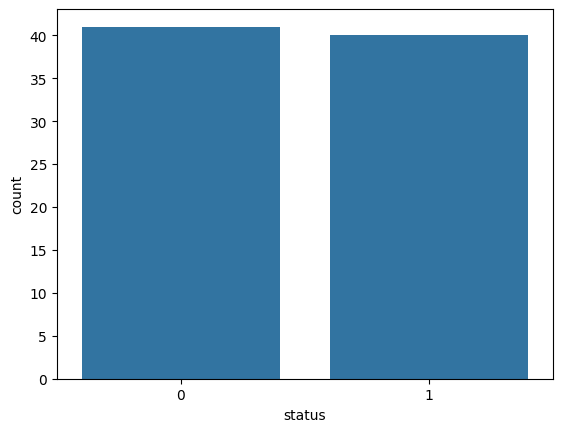

In [16]:
#Balance of Data
sns.countplot(x='status',data=df)

<Axes: >

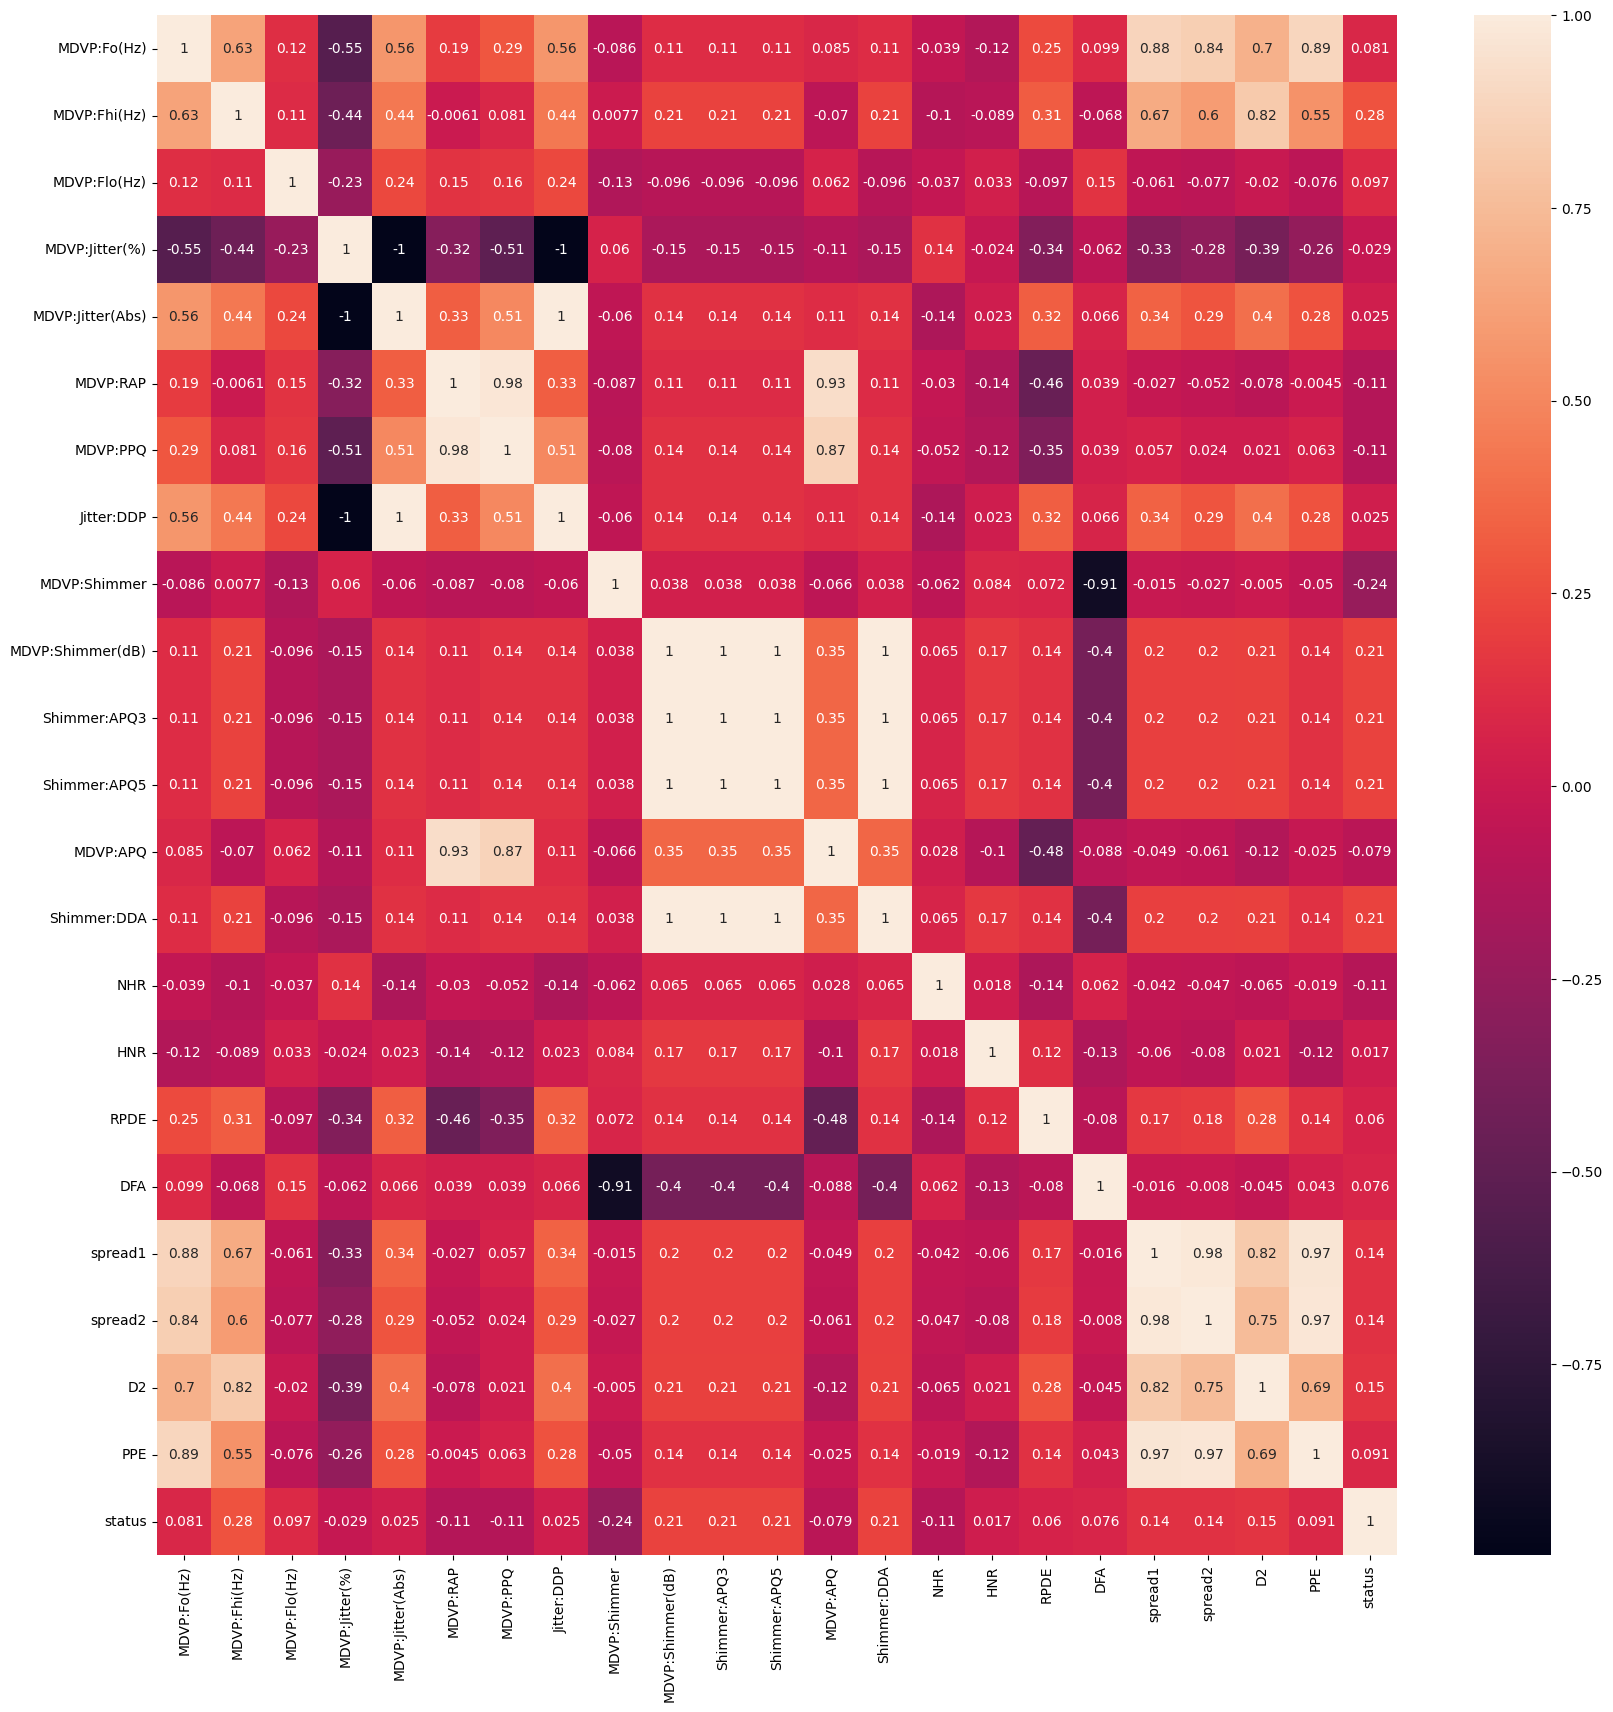

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,ax=ax)

In this correlation heatmap, we can see that many independent features are highly correlated with eachother.

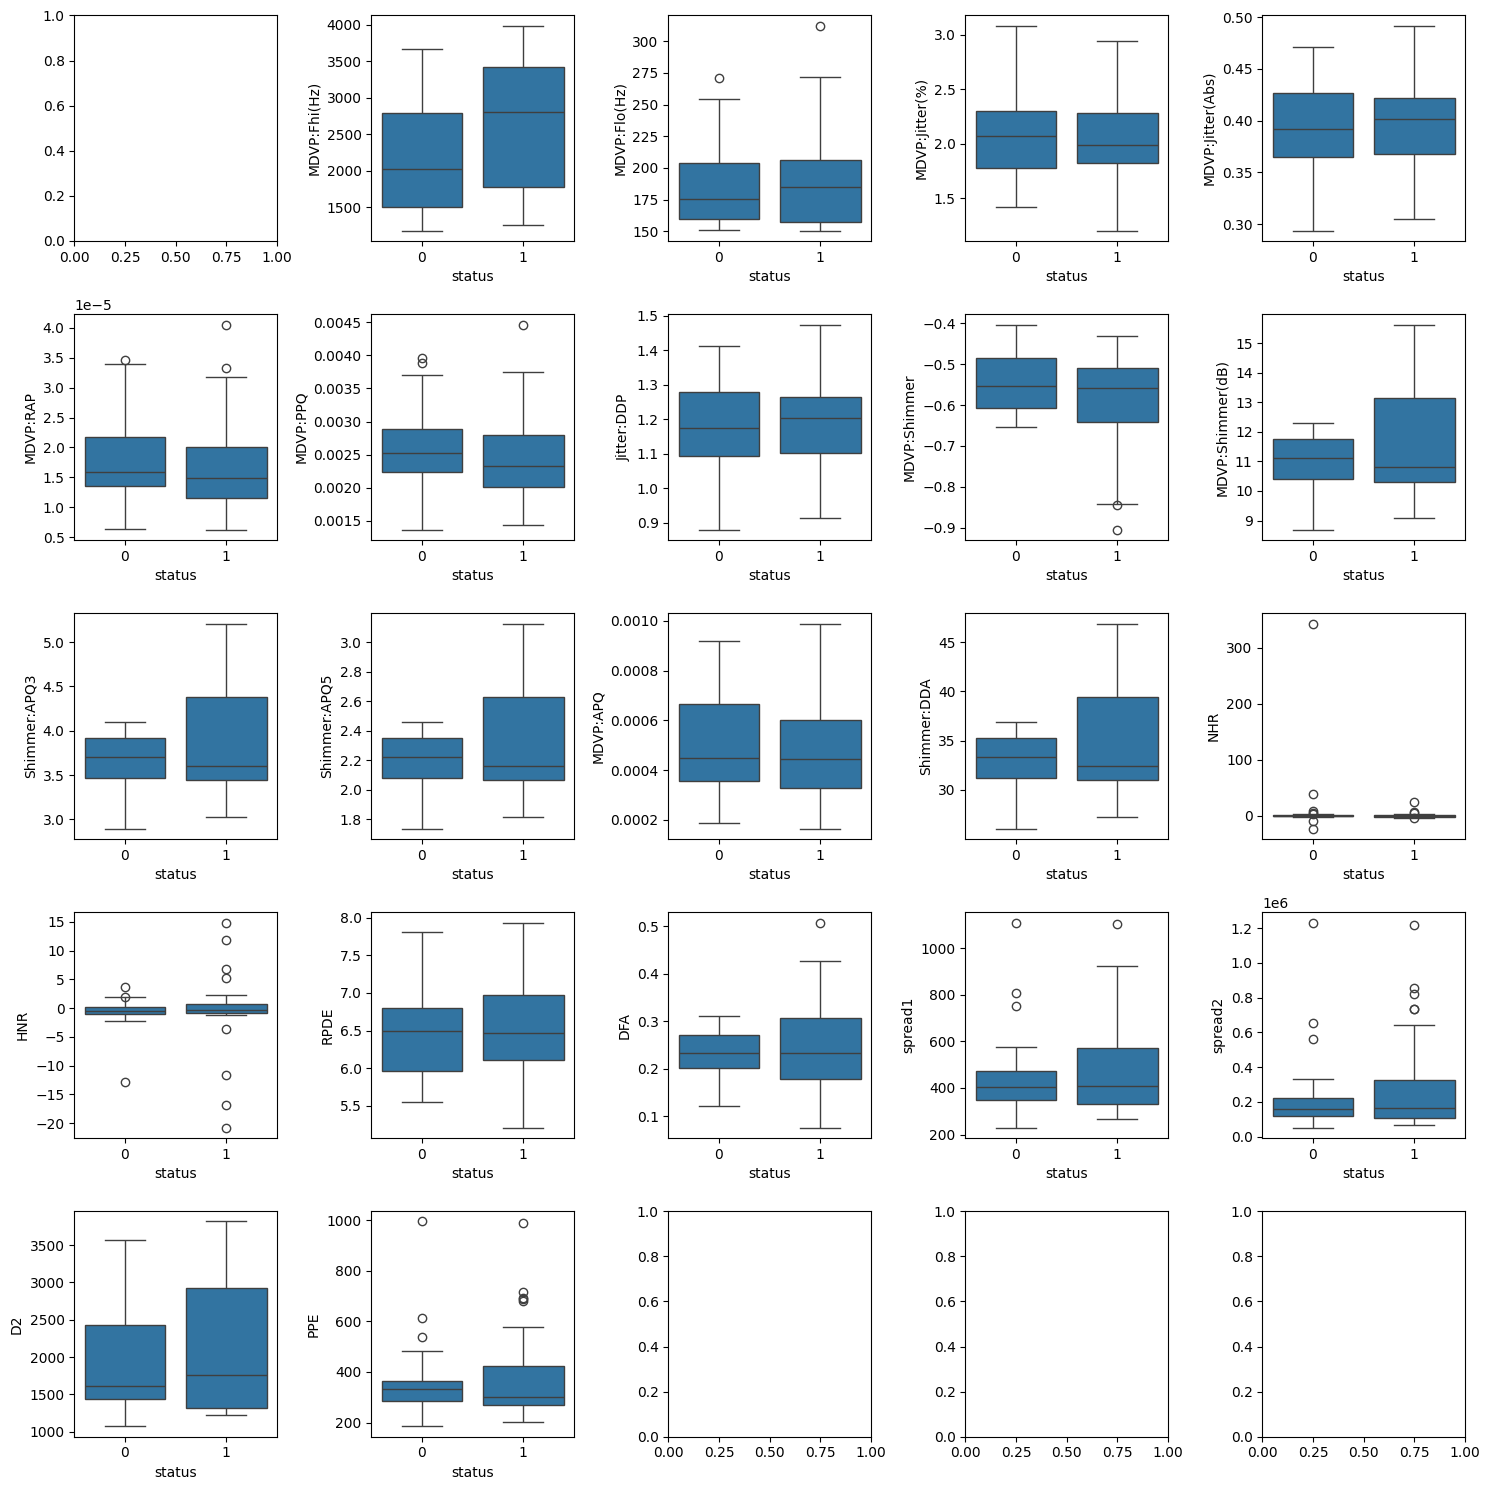

In [18]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

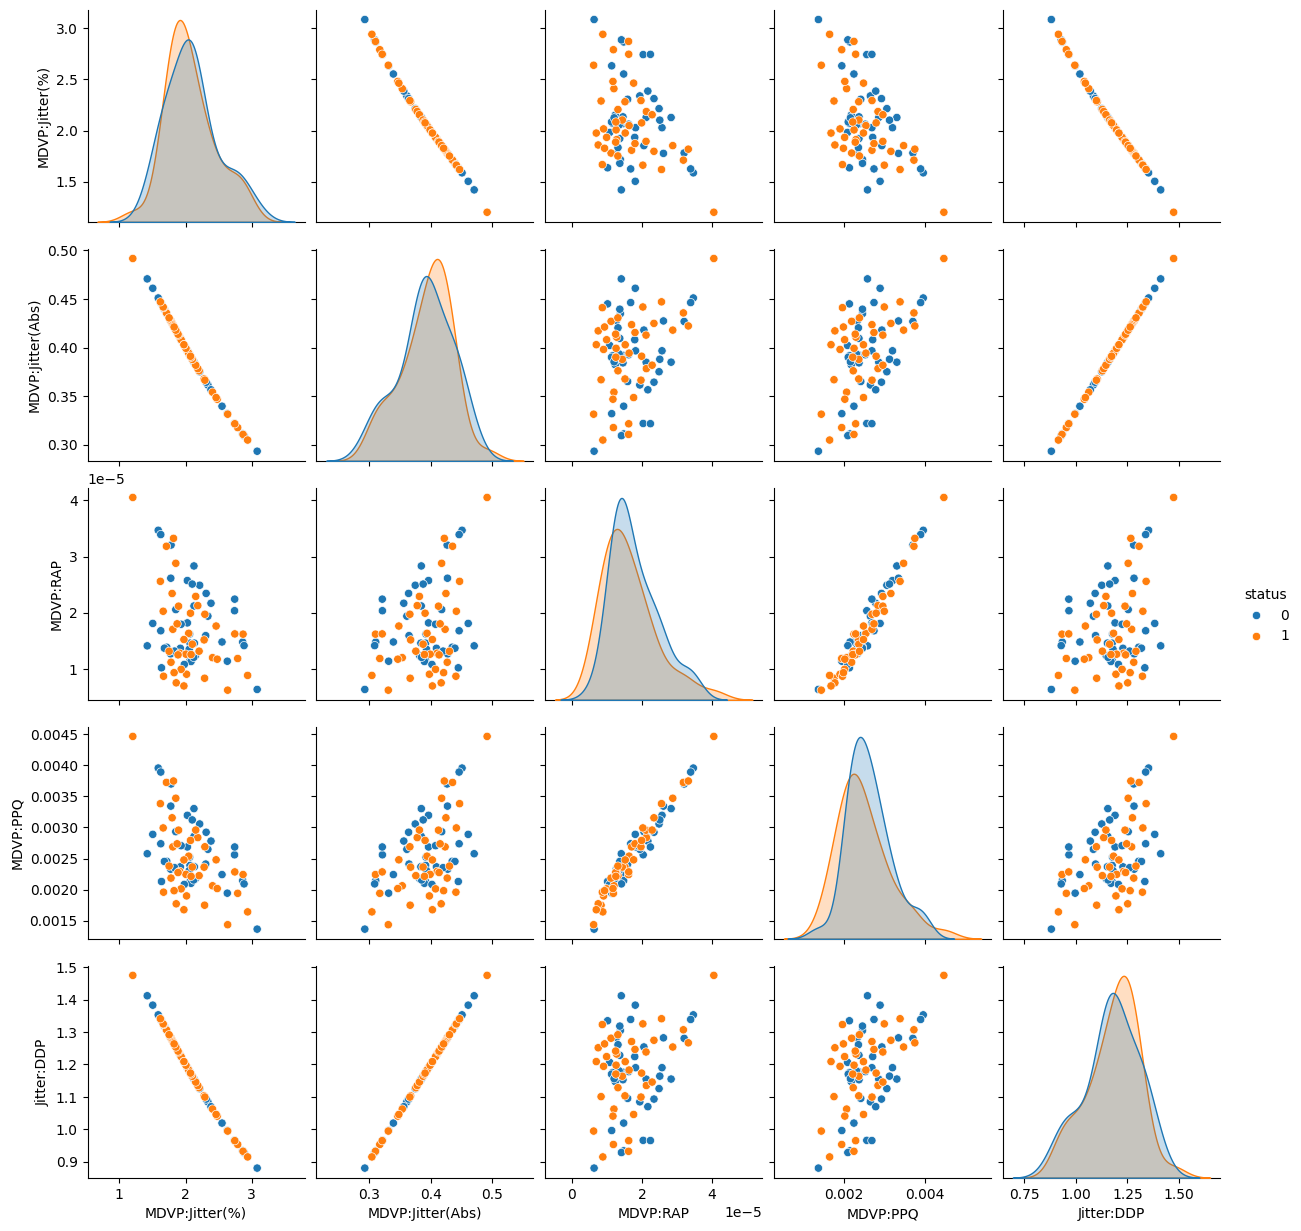

In [19]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

From the above pair plot we can understand that all these fundamental frequencies are highly correlated with eachother.

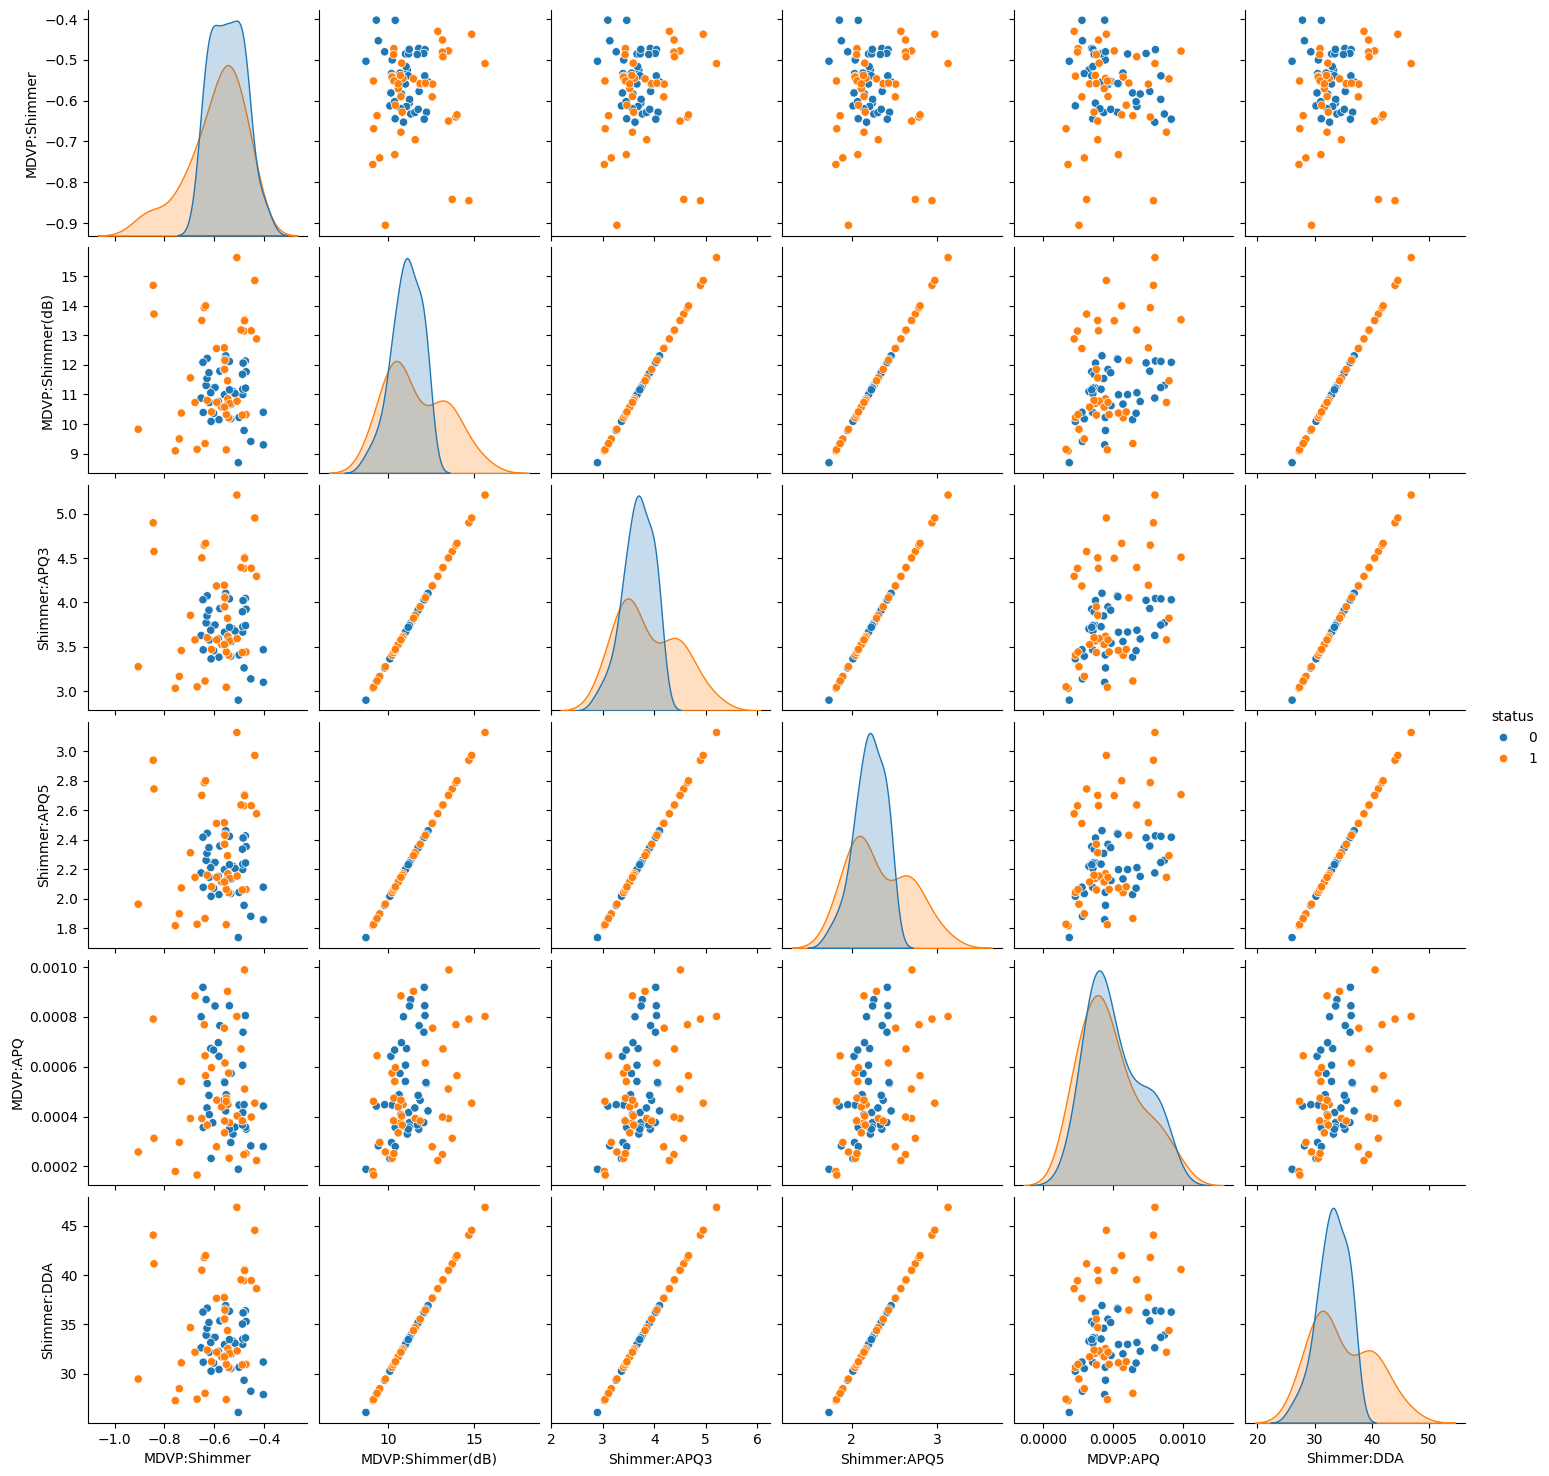

In [20]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

From the above pair plot we can understand that all these measures variation in amplitude are highly correlated with eachother.



# Balancing Dataset
---
In this section, as it is observed that the Dataset Is Heavily Imbalanced, with Number of Samples of Parkinson Disease Samples being 147, and Non-Parkinson Being only 48. Hence, in this section, we make use of **SMOTE** to **Oversample** and Balance the dataset.

In [21]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

,count
status,
0,41
1,40


In [22]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (81, 22)
Target (y) Shape Before Balancing : (81,)


In [23]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

In [24]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [25]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (82, 22)
Target (y) Shape After Balancing : (82,)


In [26]:
# Scaling features between -1 and 1  for mormalization
scaler = MinMaxScaler((-1,1))

In [27]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [77]:

import joblib


joblib.dump(scaler, 'scaler.joblib')




['scaler.joblib']

In [29]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

# Machine Learning Model Training
In this section, we have trained the following Machine Learning Models:
+ Decision Tree Classifier
+ Random Forest Classifier
+ Logistic Regression
+ SVM
+ Naive Bayes
+ KNN Classifier
+ XGBoost Classifier

## Decision Tree Classifier

In [30]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.75      0.80         8

    accuracy                           0.82        17
   macro avg       0.83      0.82      0.82        17
weighted avg       0.83      0.82      0.82        17



In [31]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [32]:
CV_dt.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'random_state': 30}

In [33]:
dt1=DecisionTreeClassifier(random_state=30, max_features='sqrt', max_depth=1, criterion='gini')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test)
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       1.00      0.25      0.40         8

    accuracy                           0.65        17
   macro avg       0.80      0.62      0.57        17
weighted avg       0.79      0.65      0.59        17



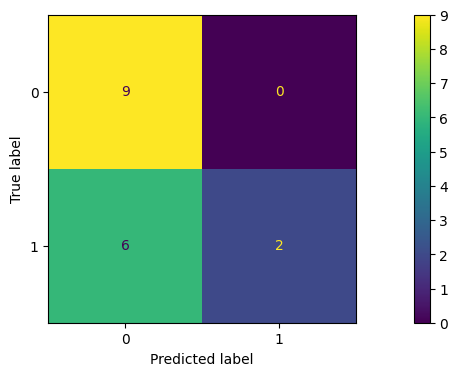

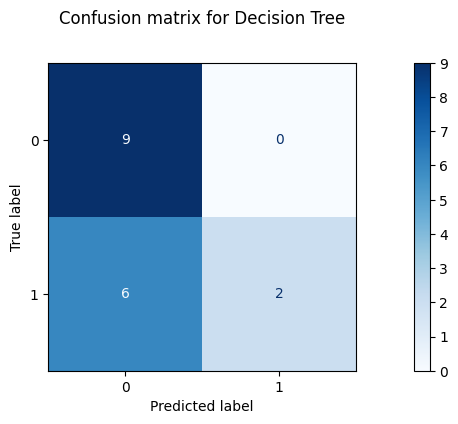

In [34]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(dt1, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()

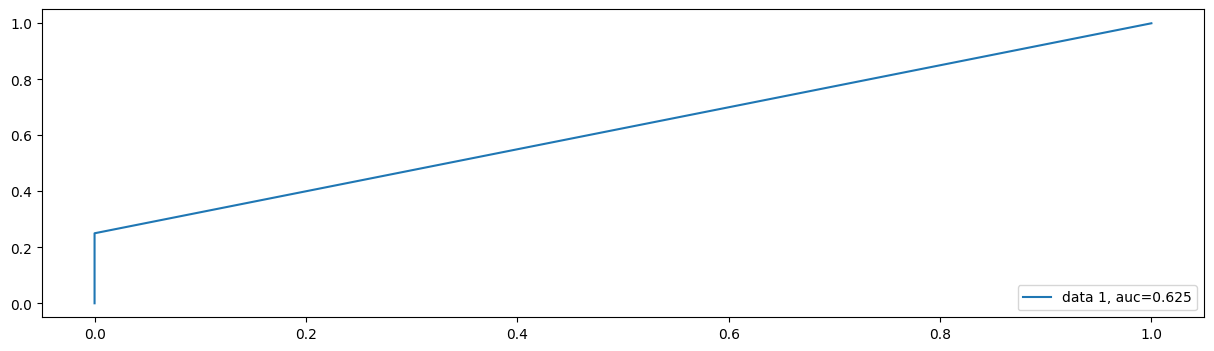

In [35]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
# Dumping Decision Tree Classifier
joblib.dump(dt1, 'dt_clf.pkl')

['dt_clf.pkl']

## Random Forest Classifier

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.88      0.88      0.88         8

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



In [38]:
param_grid = {
    'n_estimators': range(100,300,25),
    'max_features': ['sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(100,250,50),
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [39]:
rfc1=RandomForestClassifier(random_state=200, max_features='sqrt', n_estimators= 125, max_depth=8, criterion='entropy')
rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.70      0.88      0.78         8

    accuracy                           0.76        17
   macro avg       0.78      0.77      0.76        17
weighted avg       0.78      0.76      0.76        17



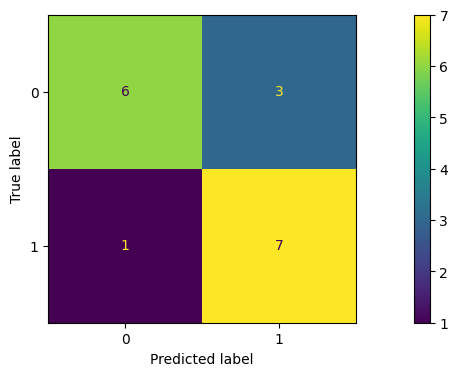

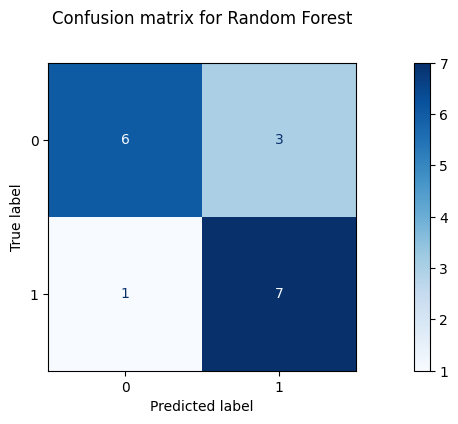

In [40]:

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(rfc1, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

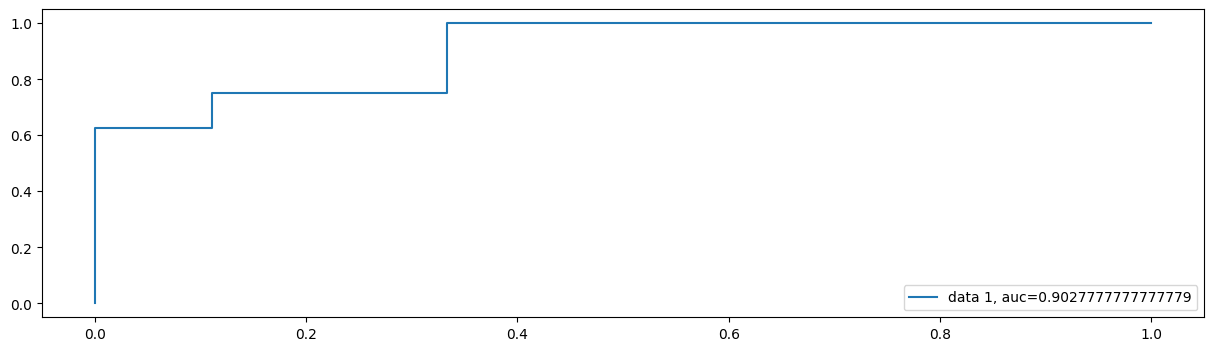

In [41]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [42]:
# Dumping Random Forest Classifier
import joblib
joblib.dump(rfc1, 'rf_clf_new.joblib')


['rf_clf_new.joblib']

## Logistic Regression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [44]:
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.55      0.75      0.63         8

    accuracy                           0.59        17
   macro avg       0.61      0.60      0.58        17
weighted avg       0.61      0.59      0.58        17

Confusion Matrix:


array([[4, 5],
       [2, 6]])

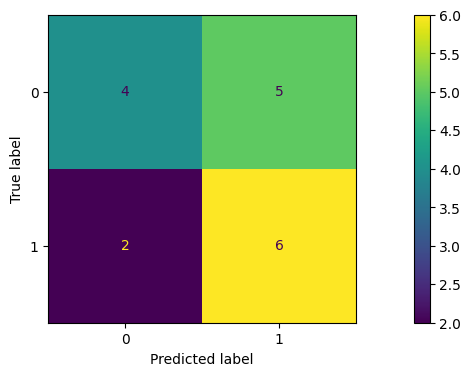

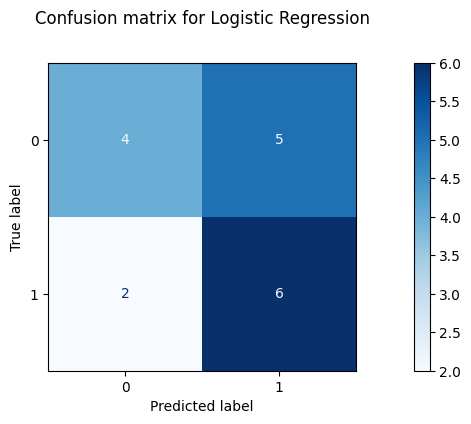

In [45]:

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()


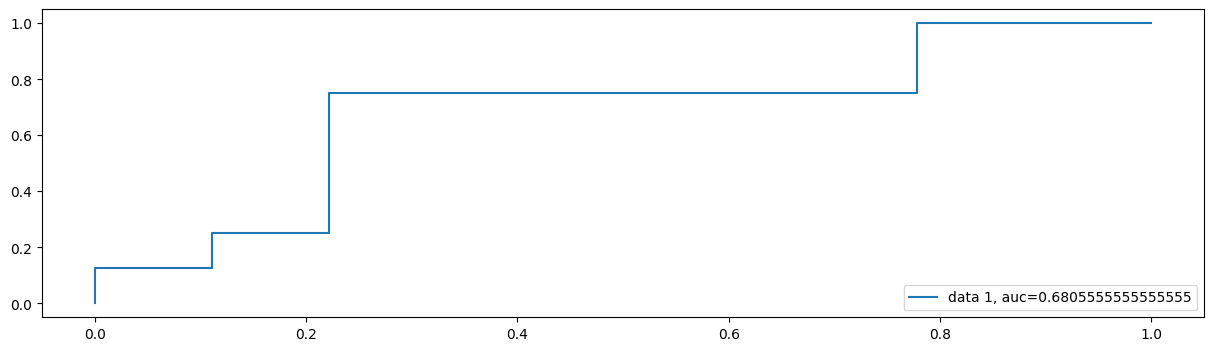

In [46]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
# Dumping Logistic Regression Model
joblib.dump(logmodel, 'lg_clf.pkl')

['lg_clf.pkl']

## SVM

SVM With Linear Kernel

In [48]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.7058823529411765
Train Set Accuracy: 0.7076923076923077


In [49]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test)

# print classification report
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.400 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.545 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.462 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.200 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.308 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

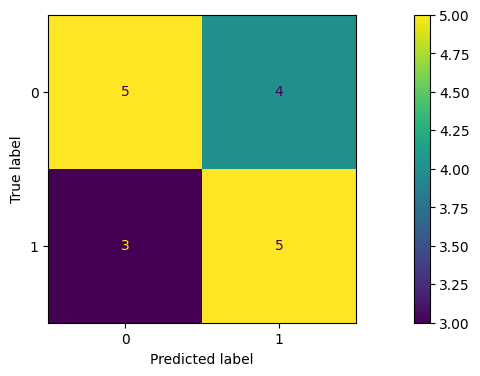

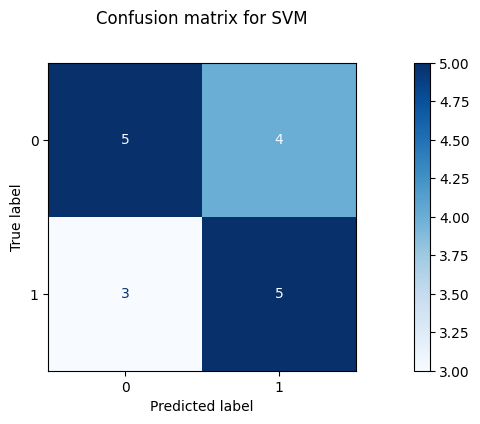

In [50]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(grid_SVC, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for SVM', y=1.1)
plt.show()


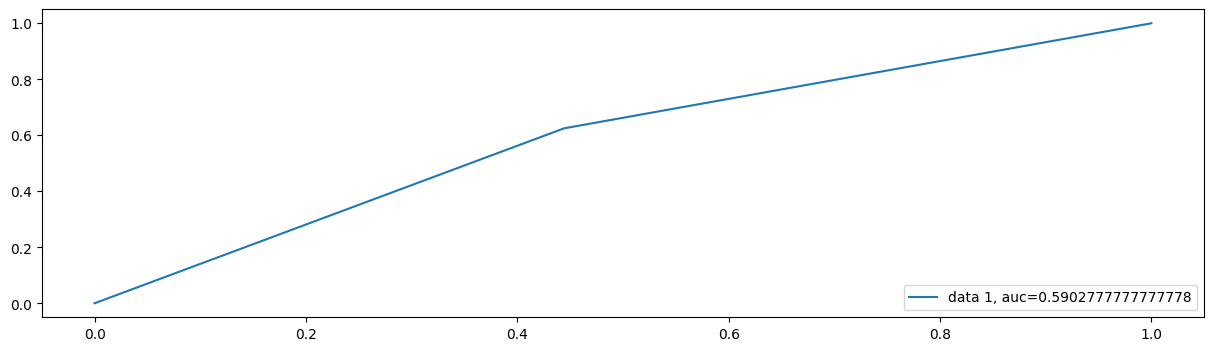

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
# Dumping SVM Classifier
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

## Naive Bayes

In [53]:
# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



In [54]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[8, 1],
       [3, 5]])

In [55]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 76.47058823529412


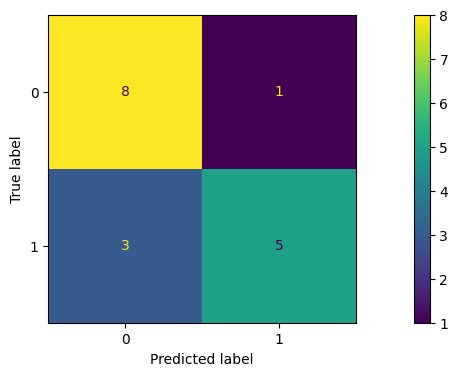

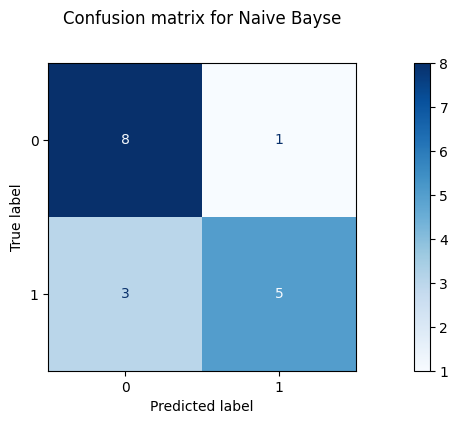

In [56]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Naive Bayse', y=1.1)
plt.show()


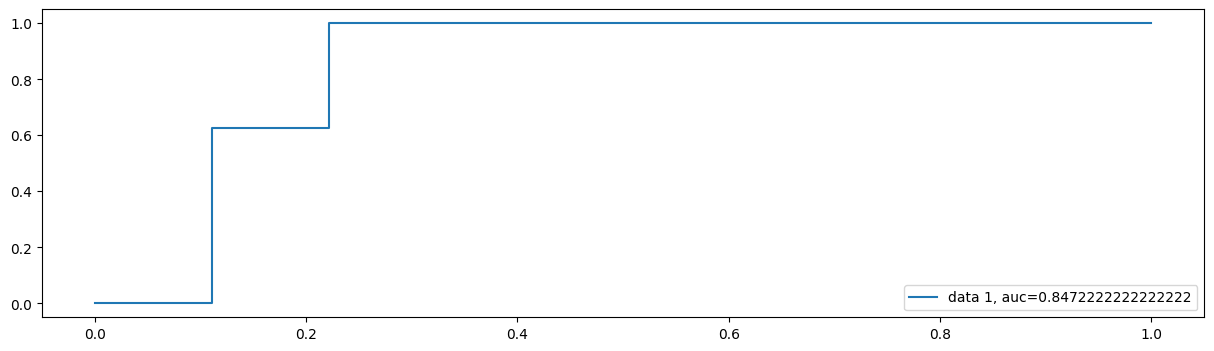

In [57]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
# Dumping Naive Bayes Classifier
joblib.dump(gnb, 'nb_clf.pkl')

['nb_clf.pkl']

## KNN Classifier


In [59]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.47058823529411764, 0.6470588235294118, 0.6470588235294118, 0.5882352941176471, 0.6470588235294118, 0.7058823529411765, 0.5882352941176471, 0.5882352941176471]


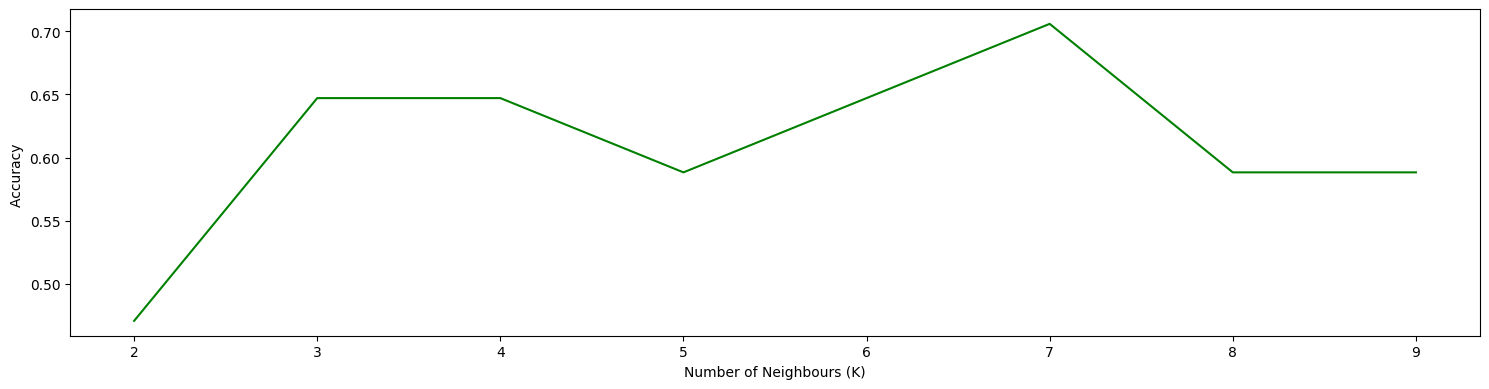

In [60]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

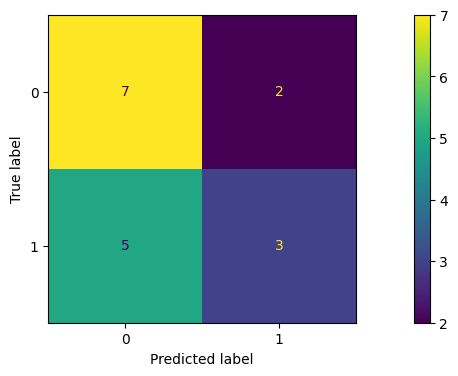

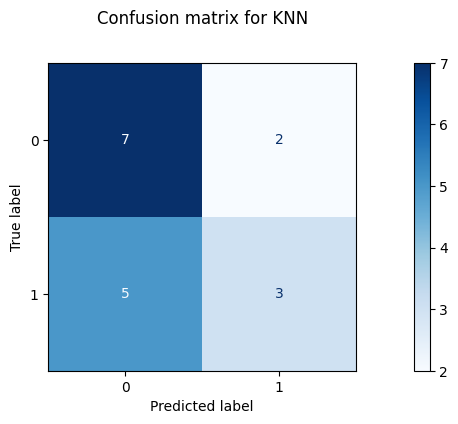

In [62]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for KNN', y=1.1)
plt.show()


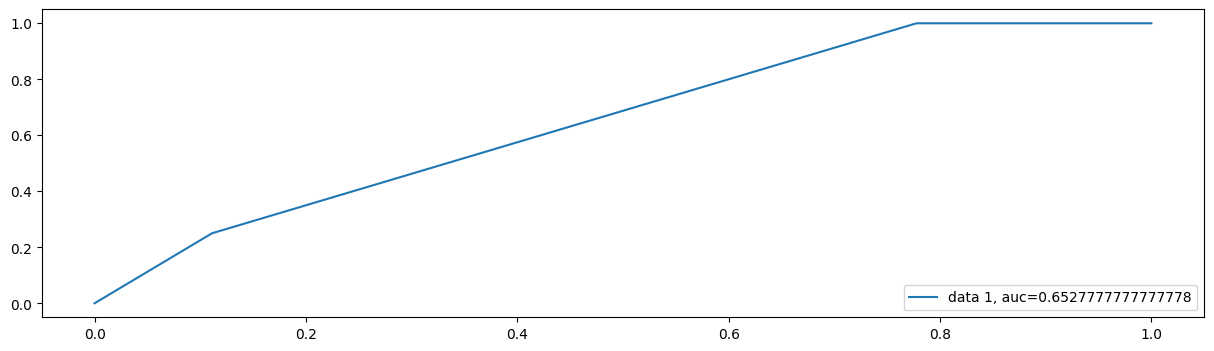

In [63]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [64]:
# Dumping KNN Classifier
joblib.dump(knn, 'knn_clf.pkl')

['knn_clf.pkl']

## XGBoost Classifer
In this section, we have trained a XGBoost Classifier, for classification of Instances to be Parkinsons or Not. The following parameters of the XGBoost Classifier have been optimized in this section:
+ **Max Depth**: This value is used to determine the Maximum Depth of the Tree.
+ **ETA** : This is also known as Learning Rate.
+ **Reg_Lambda** : This is the L2 Regularization for the weights.
+ **Random State** : This is used to evaluate and determine the performance of the model based on different random states.

The *Parameter Optimization* has been performed using **GridSearchCV** with the following parameters:
+ **Scoring Parameter**: F1 Score
+ **Cross Validation**: 3

In [65]:
# Defining Parameter Dictionary
param_dict = {'max_depth': range(4,8), 'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
              'reg_lambda' : [0.8, 0.9, 1, 1.1, 1.2],
              'random_state': [300, 600, 900]}

In [66]:
clf = GridSearchCV(XGBClassifier(), param_grid = param_dict,
                   scoring = 'f1', cv = 3, verbose = 1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(4, 8),
                         'random_state': [300, 600, 900],
                         'reg_lambda': [0.8, 0.9, 1, 1.1, 1.2]},
             scoring='f1', verbose=1)

In [67]:
print('Best Score :', clf.best_score_)
print('Best Parameters :', clf.best_params_)

Best Score : 0.5493025493025493
Best Parameters : {'eta': 0.3, 'max_depth': 5, 'random_state': 300, 'reg_lambda': 1.1}


In [68]:
# Extracting Best Classifier From GridSearchCV
xgb_clf = clf.best_estimator_

In [69]:
# Evaluating Performance on Train Set
pred = xgb_clf.predict(X_train)
print('For Train Set')
print('Accuracy :', metrics.accuracy_score(y_train, pred))
print('Precision :', metrics.precision_score(y_train, pred))
print('Recall :', metrics.recall_score(y_train, pred))
print('R2 Score :', metrics.r2_score(y_train, pred))

For Train Set
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
R2 Score : 1.0


In [70]:
# Evaluating Performance on Train Set
# Evaluating Performance on Train Set
predXGB = xgb_clf.predict(X_test)
print('For Test Set')
print('Accuracy :', metrics.accuracy_score(y_test, predXGB))
print('Precision :', metrics.precision_score(y_test, predXGB))
print('Recall :', metrics.recall_score(y_test, predXGB))
print('R2 Score :', metrics.r2_score(y_test, predXGB))

For Test Set
Accuracy : 0.7647058823529411
Precision : 0.7
Recall : 0.875
R2 Score : 0.05555555555555558


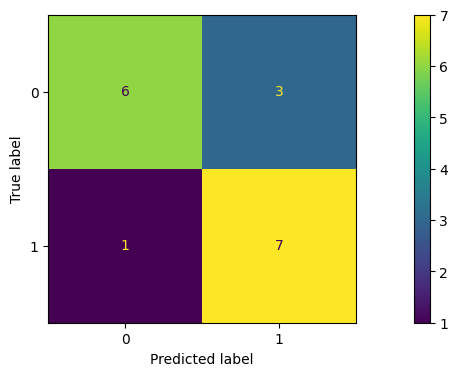

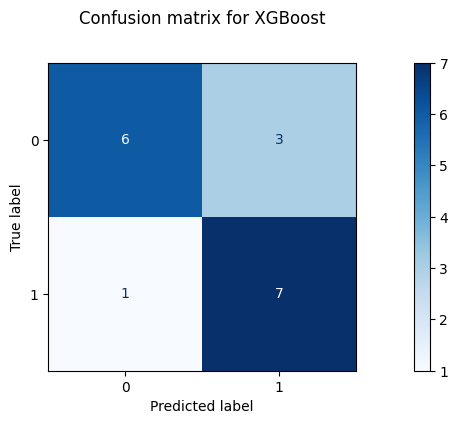

In [71]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for XGBoost', y=1.1)
plt.show()


In [72]:
# Dumping XGBoost Classifier
joblib.dump(xgb_clf, 'xgb_clf.pkl')

['xgb_clf.pkl']

In [75]:
import joblib
joblib.dump(xgb_clf, 'xgb_clf_new.joblib')

['xgb_clf_new.joblib']

# Comparision Table

In [73]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
        'XGB':[accuracy_score(y_test, predXGB), f1_score(y_test, predXGB), recall_score(y_test, predXGB), precision_score(y_test, predXGB), r2_score(y_test, predXGB)]
}
chart = pd.DataFrame(chart)

In [74]:
 display(chart)

,Metric,DT,RF,LR,SVM,NB,KNN,XGB
0,Accuracy,0.647059,0.764706,0.588235,0.588235,0.764706,0.588235,0.764706
1,F1-Score,0.400000,0.777778,0.631579,0.588235,0.714286,0.461538,0.777778
2,Recall,0.250000,0.875000,0.750000,0.625000,0.625000,0.375000,0.875000
3,Precision,1.000000,0.700000,0.545455,0.555556,0.833333,0.600000,0.700000
4,R2-Score,-0.416667,0.055556,-0.652778,-0.652778,0.055556,-0.652778,0.055556
